# Analyzing Stack Exchange

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Questions welcome in this site**
Generally any kind of questions seems to be accepted in this site. Sample questions I've seen so far include;
- *How do you go about apologizing to my ex-professor for putting her in an uncomfortable position?*
- *Is there a phrase that means "too important"?
- *What is a real world example of a for-loop*?

**What, other than questions, does the site's home subdivide into?**
There's "Tour", "About Us", "Meta", etc. They also provide a list of sites which include Stack Overflow, Server Fault, Mathematics, Super User, Arqade, etc.


**Tables that look promising**
- posts
- comments

## Read and Explore the Data

In [2]:
questions = pd.read_csv("2019_questions.csv")

In [3]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null object
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: float64(1), int64(4), object(2)
memory usage: 483.5+ KB


In [4]:
questions.isna().sum()

Id                  0
CreationDate        0
Score               0
ViewCount           0
Tags                0
AnswerCount         0
FavoriteCount    7432
dtype: int64

Here we see that the "Tags" column is not in a state we expect it to be

In [5]:
questions['Tags']

0                         <machine-learning><data-mining>
1       <machine-learning><regression><linear-regressi...
2            <python><time-series><forecast><forecasting>
3                   <machine-learning><scikit-learn><pca>
4                <dataset><bigdata><data><speech-to-text>
5                                           <fuzzy-logic>
6       <time-series><anomaly-detection><online-learning>
7                                  <matrix-factorisation>
8                   <correlation><naive-bayes-classifier>
9       <machine-learning><python><deep-learning><kera...
10                                     <machine-learning>
11                             <machine-learning><theory>
12                   <machine-learning><gradient-descent>
13      <nlp><clustering><feature-extraction><encoding...
14                  <python><scikit-learn><pandas><numpy>
15      <python><scikit-learn><decision-trees><accurac...
16                                       <python><pandas>
17            

## Clean the Data

In [6]:
questions = questions.fillna(0)

In [7]:
questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,0.0
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,0.0
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,0.0
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,0.0
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,0.0


In [20]:
def clean_tags(df):
    df['Tags'] = (df['Tags']
              .str.replace("><", ", ")
              .str.replace(">", "")
              .str.replace("<", ""))
    
    return df

questions = clean_tags(questions)
questions.head()['Tags']

0                        machine-learning, data-mining
1    machine-learning, regression, linear-regressio...
2           python, time-series, forecast, forecasting
3                  machine-learning, scikit-learn, pca
4               dataset, bigdata, data, speech-to-text
Name: Tags, dtype: object

## Check Popular Tags

In [14]:
def get_unique_tags(df):
    tags_df = df['Tags'].str.split(", ", expand=True)

    unique_tags = []
    for col in tags_df:
        unique_tags.extend(tags_df[col].unique())

    unique_tags = list(set(unique_tags))
    unique_tags
    
    return unique_tags

In [16]:
unique_tags = get_unique_tags(questions)

In [12]:
tag_count = {}
for tag in unique_tags:
    for used_tags in questions['Tags']:
        if tag in used_tags.split(", "):
            if tag in tag_count:
                tag_count[tag] += 1
            else:
                tag_count[tag] = 1

In [13]:
pd.Series(tag_count).sort_values(ascending=False)

machine-learning             2693
python                       1814
deep-learning                1220
neural-network               1055
keras                         935
classification                685
tensorflow                    584
scikit-learn                  540
nlp                           493
cnn                           489
time-series                   466
lstm                          402
pandas                        354
regression                    347
dataset                       340
r                             268
predictive-modeling           265
clustering                    257
statistics                    234
machine-learning-model        224
data-mining                   217
data                          213
image-classification          211
feature-selection             209
reinforcement-learning        203
data-science-model            186
pytorch                       175
linear-regression             175
xgboost                       165
feature-engine

## Is Deep Learning a Fad?

In [18]:
all_questions = pd.read_csv("all_questions.csv")

In [22]:
unique_tags = get_unique_tags(clean_tags(all_questions))
unique_tags

['transformer',
 'glm',
 'neural-style-transfer',
 'apache-pig',
 'tableau',
 'pandas',
 'mean-shift',
 'numerical',
 'wikipedia',
 'lsi',
 'data-transfer',
 'dbscan',
 'stemming',
 'feature-map',
 'fastai',
 'freebase',
 'keras-rl',
 'noisification',
 'matlab',
 'ensemble-modeling',
 'state-of-the-art',
 'random-forest',
 'bayesian-networks',
 'text-mining',
 'forecast',
 'autoencoder',
 'structured-data',
 'nvidia',
 'pattern-recognition',
 'feature-extraction',
 'machine-learning',
 'keras',
 'spyder',
 'pybrain',
 'gradient-descent',
 'stanford-nlp',
 'sql',
 'normal-equation',
 'named-entity-recognition',
 'automation',
 'chatbot',
 'jupyter',
 'mse',
 'spss',
 'pooling',
 'features',
 'handwritten',
 'expectation-maximization',
 'prediction',
 'pickle',
 'tesseract',
 'estimators',
 'regex',
 'visualization',
 'open-set',
 'alex-net',
 'data-mining',
 'anaconda',
 'text-filter',
 'powerbi',
 'xboost',
 'gensim',
 'tflearn',
 'automl',
 'policy-gradients',
 'reinforcement-learning

In [73]:
def get_yearmonth(row):
    year = int(row['CreationDate'].split("-")[0])
    month = int(row['CreationDate'].split("-")[1])
    
    return year * 100 + month

In [69]:
all_questions['YearMonth'] = all_questions.apply(get_yearmonth, axis=1)
all_questions.head()['YearMonth']

0    201902
1    201902
2    201902
3    201902
4    201902
Name: YearMonth, dtype: object

In [75]:
all_questions['DeepLearning'] = all_questions['Tags'].str.contains('deep-learning')

In [76]:
deep_learning = all_questions.groupby('YearMonth')[['Id', 'DeepLearning']].sum()
deep_learning = deep_learning.rename(columns={"Id": "Total"})
deep_learning['PctDeepLearning'] = deep_learning['DeepLearning'] / deep_learning['Total']
deep_learning

,Total,DeepLearning,PctDeepLearning
YearMonth,,,
201405,6634,0.0,0.000000
201406,43855,1.0,0.000023
201407,57678,1.0,0.000017
201408,63357,0.0,0.000000
201409,53785,0.0,0.000000
201410,134741,1.0,0.000007
201411,158807,1.0,0.000006
201412,256130,4.0,0.000016
201501,299010,0.0,0.000000


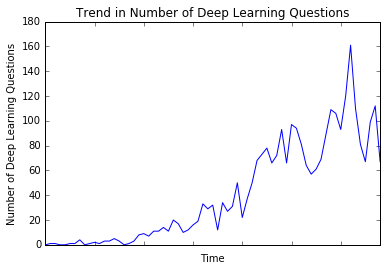

In [85]:
deep_learning['DeepLearning'].plot.line()
plt.title("Trend in Number of Deep Learning Questions")
plt.ylabel("Number of Deep Learning Questions")
plt.xlabel("Time")
plt.xticks = range(len(deep_learning))
plt.show()

Seems like deep learning has been reducing recently, but over the last few years, it's mention was generally on the rise